XK医疗模型

注意：在“修改”里边把笔记本设置改为GPU

切换运行时会清空之前的数据，可能需要重新上传

GPU额度（每次连续12个小时，下次是12个小时之后）




In [1]:
!ls .

sample_data


In [2]:
!git clone https://github.com/dst1213/xk_llama_med.git

Cloning into 'xk_llama_med'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 98 (delta 23), reused 37 (delta 12), pack-reused 49
Unpacking objects: 100% (98/98), 61.81 MiB | 8.56 MiB/s, done.


In [3]:
import os
os.chdir("xk_llama_med")

In [4]:
!pip install -r ./requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-y8z2_f08
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-y8z2_f08
  Resolved https://github.com/huggingface/peft.git to commit b1059b73aab9043b118ff19b0cf96263ea86248a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-eoi9geef
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-eoi9geef
  Resolved https://github.com/huggingface/transformers.git to commit bbfb9fc22bdd49a45dd6ed850fc78c4d99b59afb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... 

In [5]:
!ls .

assets				 infer_literature.py	   lora-llama-med
data				 infer.py		   other
data-literature			 LICENSE		   README.md
export_hf_checkpoint.py		 llama_model_huatuo.ipynb  requirements.txt
export_state_dict_checkpoint.py  llama_model_xk.ipynb	   scripts
finetune.py			 lora-alpaca-med	   templates
generate.py			 lora-alpaca-med-alldata   utils
infer_api.py			 lora-llama-literature


In [6]:
#基于医学知识库，这一步必须执行，会自动下载llama模型！！！
#golden output是正确的标签，model output是模型预测的结果，两者可以对比评估模型效果
!bash ./scripts/infer.sh   # 先改一下--load_8bit True \，不然CUDA OOM，这里已经改过了，第一次会自动下载llama模型

2023-05-08 11:14:18.145373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/

In [ ]:
#基于医学文献（可选）
#单轮，除了要加8bit还要把"""去掉，sh不支持"""
!bash ./scripts/infer-literature-single.sh


2023-05-08 06:07:24.791177: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/

In [ ]:
#基于医学文献（可选）
#多轮，除了要加8bit还要把"""去掉，sh不支持"""
!bash ./scripts/infer-literature-multi.sh

In [ ]:
# 文件测试（可选）
!bash ./scripts/test.sh

ori
./scripts/test.sh: line 29: infer_result/o_tmp.txt: No such file or directory
alpaca
./scripts/test.sh: line 31: infer_result/a_tmp.txt: No such file or directory
med
./scripts/test.sh: line 33: infer_result/m_tmp.txt: No such file or directory


界面操作如图所示：

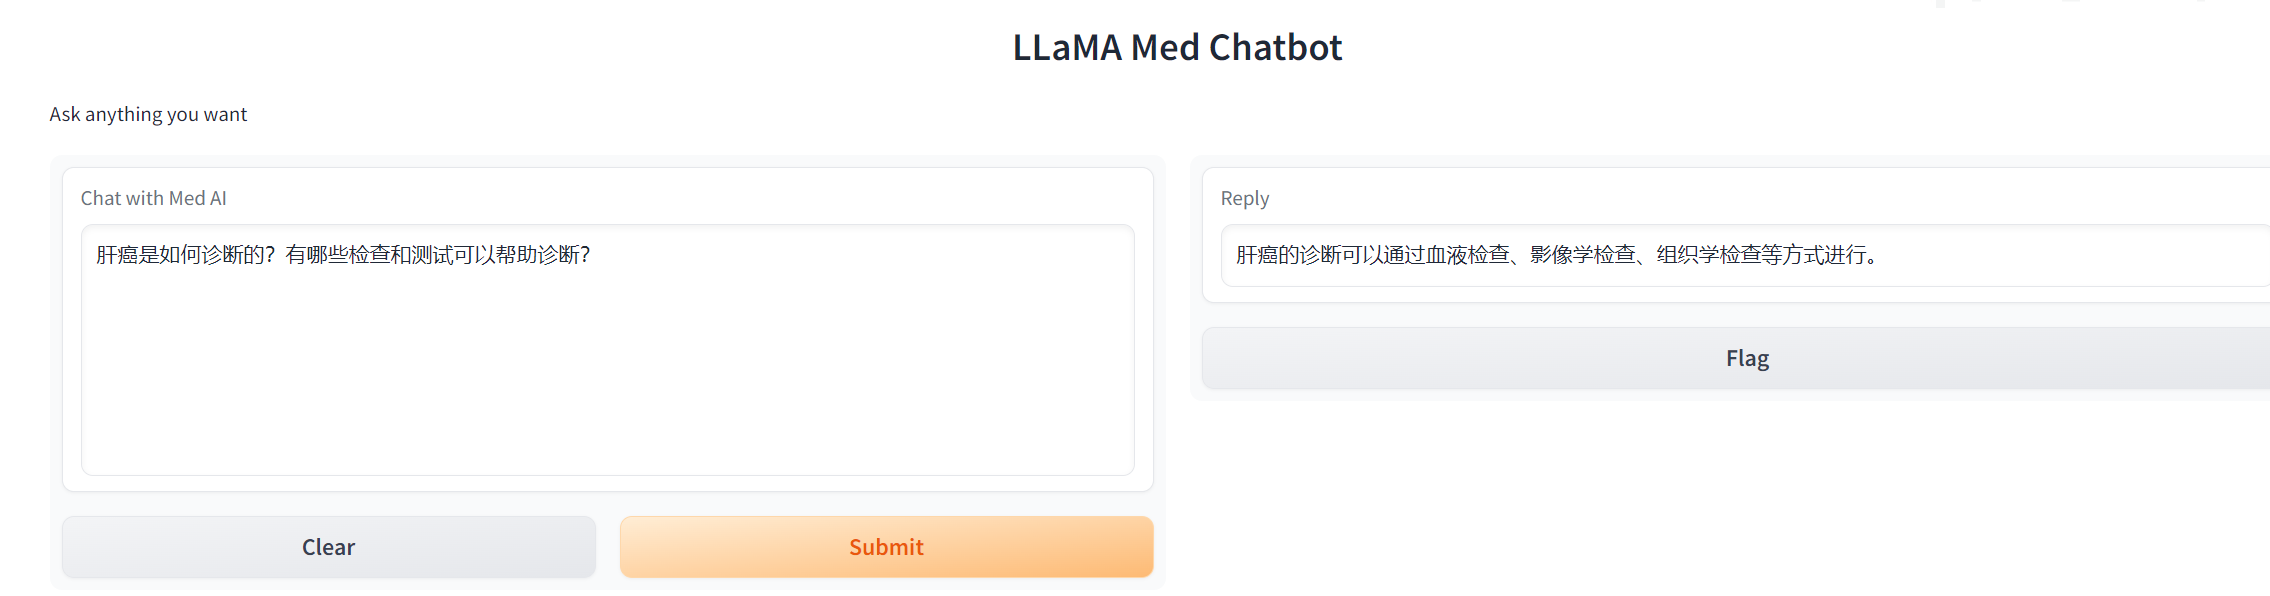

In [ ]:
# 界面操作（可选，建议使用）
# 点击链接即可在界面使用模型。Running on public URL: https://xxxxx.gradio.live
# 注意：只管3天，This share link expires in 72 hours
!python infer_api.py

2023-05-08 11:21:20.862048: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/

In [15]:
# 关闭界面调试
import gradio
gradio.close_all()

In [11]:
# 推理接口（单次接口，批量的参考infer.py main函数内的infer_from_json函数）
from infer_api import *


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//172.28.0.1'), PosixPath('http'), PosixPath('8013')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

using lora ./lora-llama-med
###infering###
###instruction###
小张最近感觉身体不适，出现心悸、气促等症状。体检发现心脏扩大、搏动减弱。
###golden output###
小张可能患有心肌炎，建议进行心电图和心脏超声等检查来确定诊断。治疗方案包括使用泼尼松、生脉饮和三磷酸腺苷等药物，同时建议适当控制体温，保持良好的营养状况。
###model output###
小张可能患有心血病。建议到医院进行检查和治疗。
###infering###
###instruction###
小王被确诊为肝炎双重感染，最可能的并发症是什么？
###golden output###
最可能的并发症是肝癌和肝硬化。
###model output###
肝炎
###infering###
###instruction###
麻风病和儿童哮喘的病因是否一致？
###golden output###
不一致，麻风病的病因是麻风分枝杆菌，而儿童哮喘的病因是气候、药物、吸入过敏原等。
###model output###
不一致。麻风病的病因是麻风，而儿童哮喘的病因是气胸。
###infering###
###instruction###
一位患者出现了持续性的胀痛和黄疸，经影像学检查后确诊为肝胆管结石病，应该采取哪些治疗方案？
###golden output###
可以考虑采用残石的处理、微创保肝取石术或手术治疗等治疗方案。
###model output###
针对肝胆管结石病的治疗方案包括药物治疗和手术治疗。
###infering###
###instruction###
一位35岁女性患者出现了关节疼痛和糖耐量异常，请问她可能患了什么疾病？
###golden output###
该患者可能患上了慢性自身免疫性胰腺炎，伴有慢性风湿性关节炎和糖耐量异常的症状。建议到消化内科进行检查和治疗。
###model output###
该患者可能患有TypeII胰腺炎。


In [13]:
res = evaluate(instruction="肝癌是什么？有哪些症状和迹象？")
res

'肝癌的症状和迹象包括肝功能衰竭、肝肿大、肝肿瘤、肝纤维化、肝纤维化、肝肿瘤、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维化、肝纤维'